# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

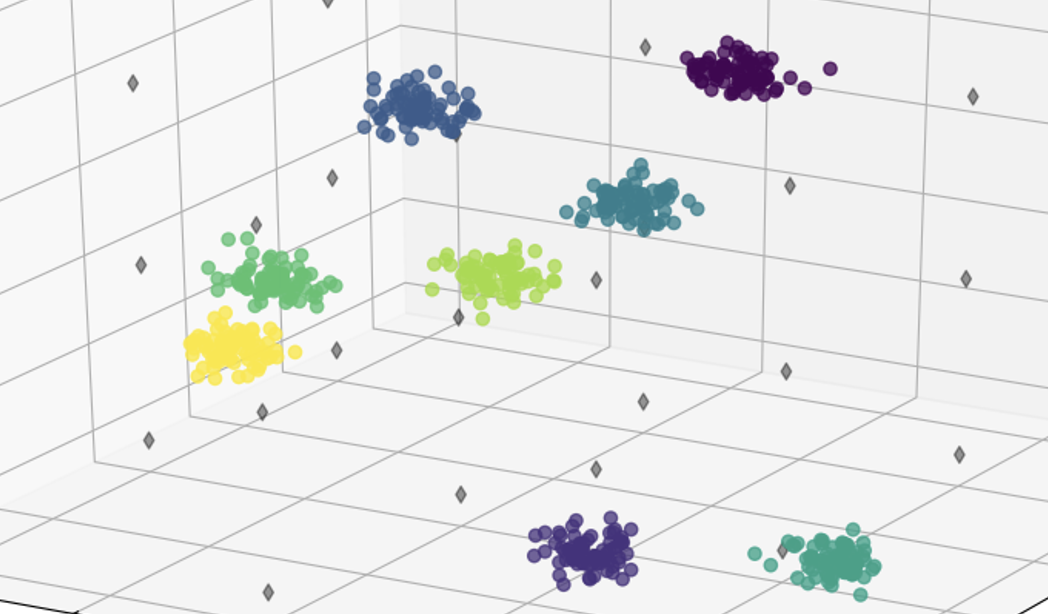

In [2]:
np.random.seed(42)

class_1_data = np.random.randn(500, 2) + np.array([-2,-2])
class_2_data = np.random.randn(500, 2) + np.array([2,2])

data = np.vstack((class_1_data, class_2_data))

first_df = pd.DataFrame(data, columns=['x', 'y'])
first_df['class'] = [0] * 500 + [1] * 500

first_df.to_csv("first_sample.csv", index=False)

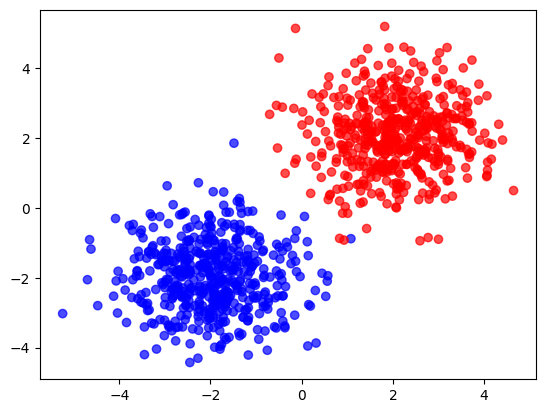

In [3]:
plt.scatter(first_df['x'], first_df['y'], c=first_df['class'], cmap='bwr', alpha=0.7)

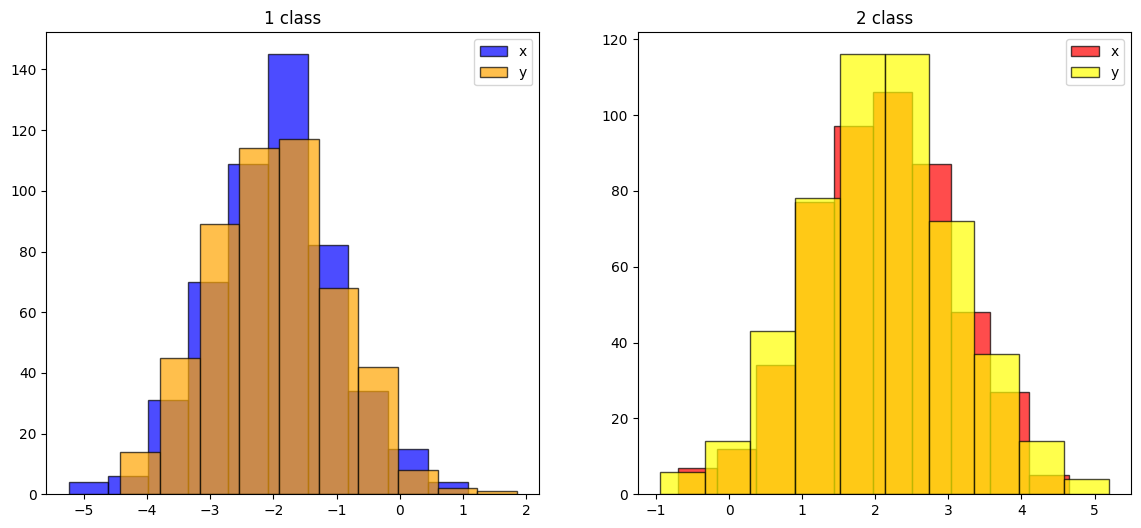

In [4]:
_, axes = plt.subplots(ncols=2, figsize=(14, 6))

axes[0].hist(first_df[first_df['class'] == 0]['x'], bins=10, color='blue', edgecolor='black', alpha=0.7, label='x')
axes[0].hist(first_df[first_df['class'] == 0]['y'], bins=10, color='orange', edgecolor='black', alpha=0.7, label='y')
axes[0].set_title("1 class")
axes[0].legend()

axes[1].hist(first_df[first_df['class'] == 1]['x'], bins=10, color='red', edgecolor='black', alpha=0.7, label='x')
axes[1].hist(first_df[first_df['class'] == 1]['y'], bins=10, color='yellow', edgecolor='black', alpha=0.7, label='y')
axes[1].set_title("2 class")
axes[1].legend()

Було згенеровано по 500 точок. Одна мала центр в -2:-2, а друга 2:2. Навколо цих центрів було згенеровано рандомні значення. \
Як бачимо по гістограмах, вони згенеровані майже ідентично, просто з різними знаками.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

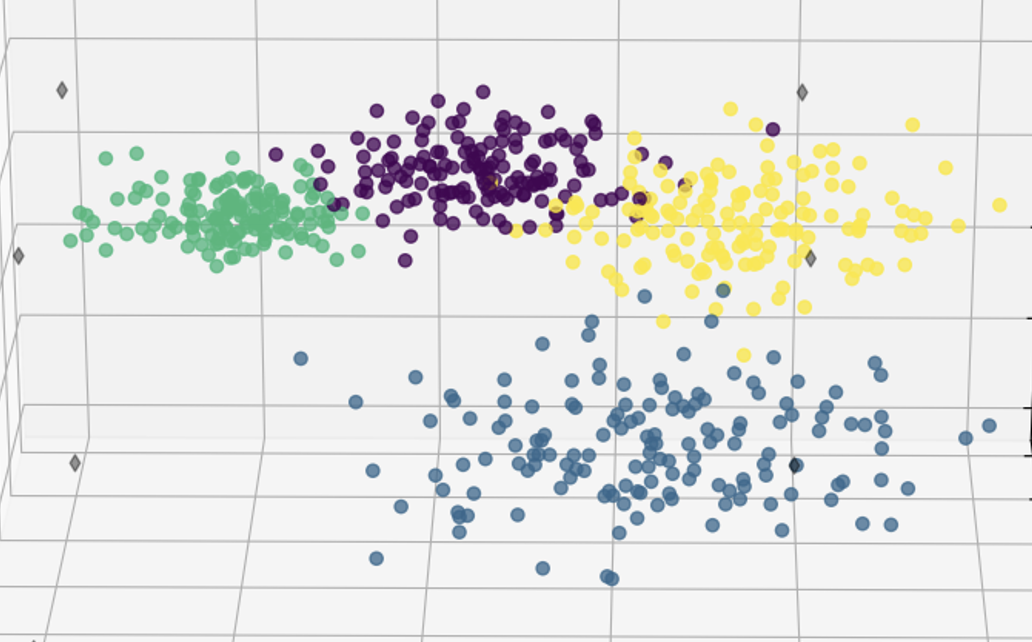

In [5]:
np.random.seed(66)

class_1_data = np.random.randn(300, 2) + np.array([2.5,2.5])
class_2_data = np.random.randn(300, 2) + np.array([-1,-1])
class_3_data = np.random.randn(300, 2) + np.array([3,-3])

data = np.vstack((class_1_data, class_2_data, class_3_data))

second_df = pd.DataFrame(data, columns=['x', 'y'])
second_df['class'] = [0] * 300 + [1] * 300 + [2] * 300

second_df.to_csv("second_sample.csv", index=False)

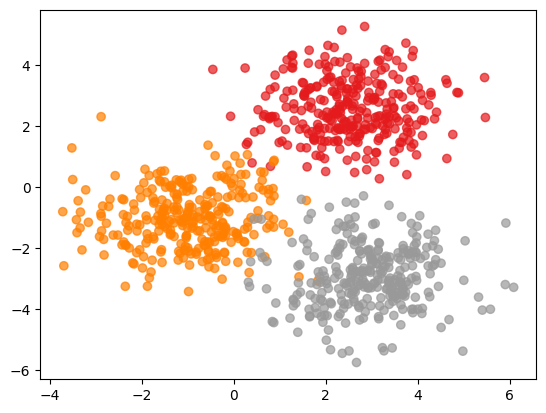

In [6]:
plt.scatter(second_df['x'], second_df['y'], c=second_df['class'], cmap='Set1', alpha=0.7)

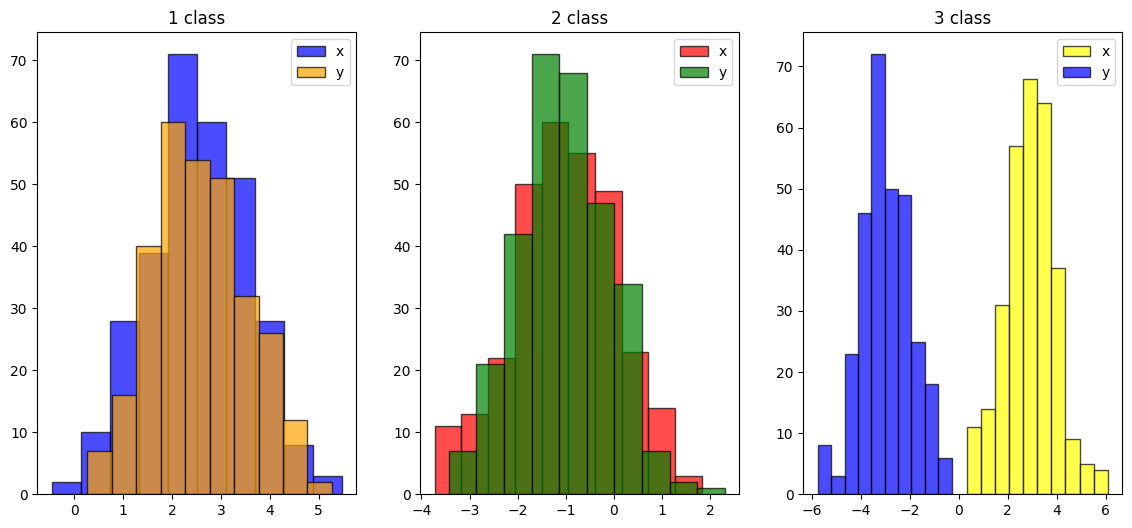

In [7]:
_, axes = plt.subplots(ncols=3, figsize=(14, 6))

axes[0].hist(second_df[second_df['class'] == 0]['x'], bins=10, color='blue', edgecolor='black', alpha=0.7, label='x')
axes[0].hist(second_df[second_df['class'] == 0]['y'], bins=10, color='orange', edgecolor='black', alpha=0.7, label='y')
axes[0].set_title("1 class")
axes[0].legend()
axes[1].hist(second_df[second_df['class'] == 1]['x'], bins=10, color='red', edgecolor='black', alpha=0.7, label='x')
axes[1].hist(second_df[second_df['class'] == 1]['y'], bins=10, color='green', edgecolor='black', alpha=0.7, label='y')
axes[1].set_title("2 class")
axes[1].legend()
axes[2].hist(second_df[second_df['class'] == 2]['x'], bins=10, color='yellow', edgecolor='black', alpha=0.7, label='x')
axes[2].hist(second_df[second_df['class'] == 2]['y'], bins=10, color='blue', edgecolor='black', alpha=0.7, label='y')
axes[2].set_title("3 class")
axes[2].legend()

Так само, було взято рандомні точки, але тепер по 300 точок на 3 класи.

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

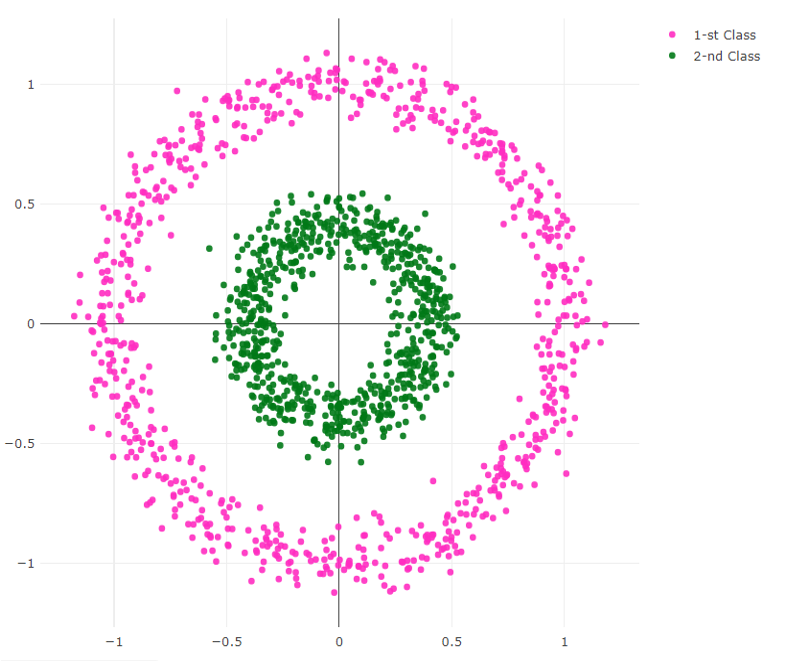

In [8]:
np.random.seed(66)

r1 = 3 + 0.5 * np.random.randn(500)
theta1 = np.random.uniform(0, 3 * np.pi, 500)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)
class_1_data = np.vstack((x1, y1)).T

r2 = 6 + 0.5 * np.random.randn(500)
theta2 = np.random.uniform(0, 6 * np.pi, 500)
x2 = r2 * np.cos(theta2)
y2 = r2 * np.sin(theta2)
class_2_data = np.vstack((x2, y2)).T

data = np.vstack((class_1_data, class_2_data))

third_df = pd.DataFrame(data, columns=['x', 'y'])
third_df['class'] = [0] * 500 + [1] * 500

third_df.to_csv("third_sample.csv", index=False)

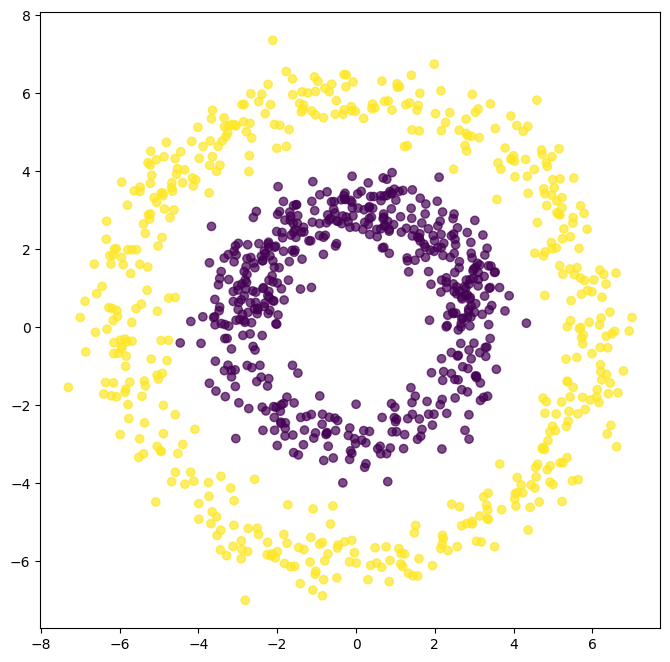

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(third_df['x'], third_df['y'], c=third_df['class'], cmap='viridis', alpha=0.7)

Text(0.5, 1.0, 'External Tor')

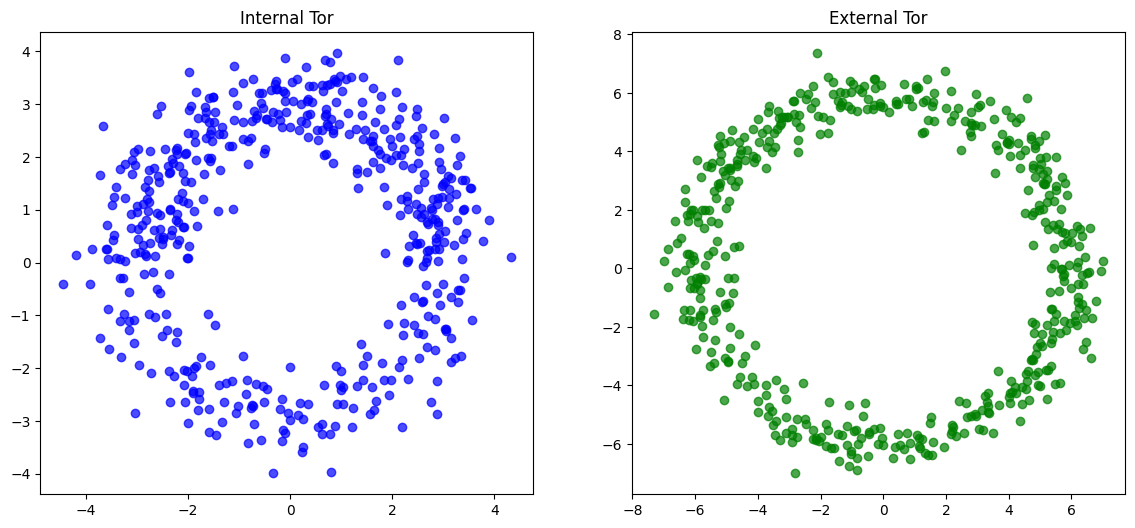

In [10]:
_, axes = plt.subplots(ncols=2, figsize=(14, 6))

axes[0].scatter(class_1_data[:, 0], class_1_data[:, 1], color='blue', alpha=0.7)
axes[0].set_title('Internal Tor')

axes[1].scatter(class_2_data[:, 0], class_2_data[:, 1], color='green', alpha=0.7)
axes[1].set_title('External Tor')

На цей раз ми згенерували дані так, щоб вони були розкидані по радіусу кола. Таким чином ми зробили кругові кластери. Спочатку \
перший клас менший, а потім другий більш зовнішній.

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

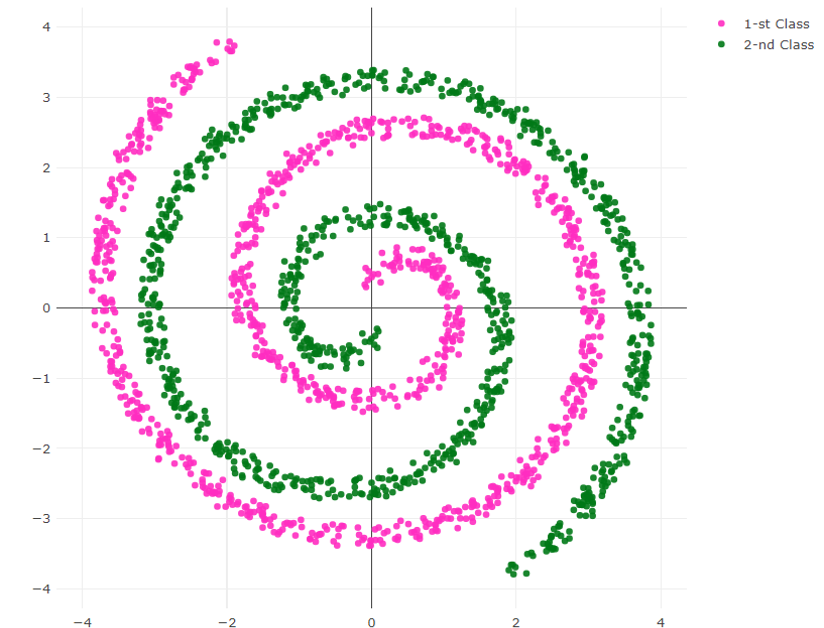

In [11]:
np.random.seed(66)

theta1 = np.linspace(0, 4 * np.pi, 500)
theta2 = np.linspace(0, 4 * np.pi, 500)

r1 = theta1 
x1 = r1 * np.cos(theta1) + np.random.normal(0, 0.30, 500) 
y1 = r1 * np.sin(theta1) + np.random.normal(0, 0.30, 500)

r2 = theta2 
x2 = r2 * np.cos(theta2 + np.pi) + np.random.normal(0, 0.30, 500)
y2 = r2 * np.sin(theta2 + np.pi) + np.random.normal(0, 0.30, 500)

data = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))

spiral_df = pd.DataFrame(data, columns=['x', 'y'])
spiral_df['class'] = [0] * 500 + [1] * 500

spiral_df.to_csv("double_spiral_sample.csv", index=False)

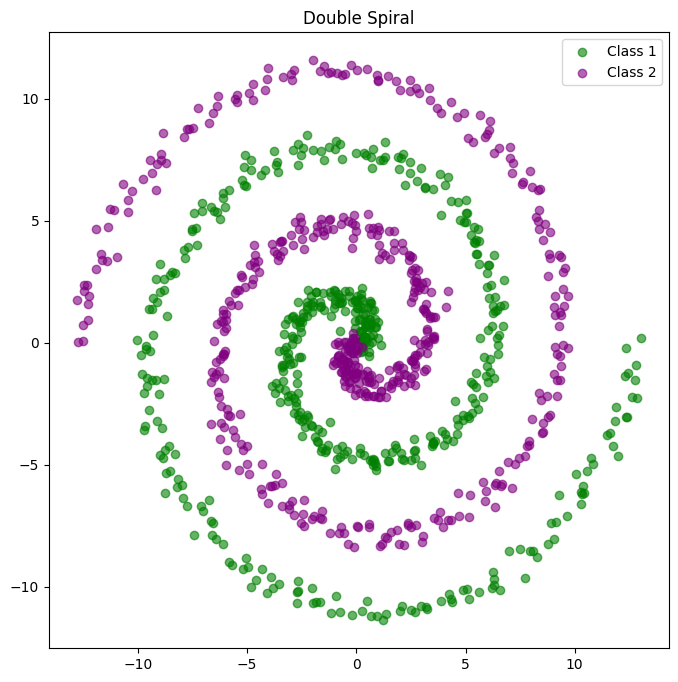

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, c='green', label='Class 1', alpha=0.6)
plt.scatter(x2, y2, c='purple', label='Class 2', alpha=0.6)

plt.title('Double Spiral')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Second Spiral')

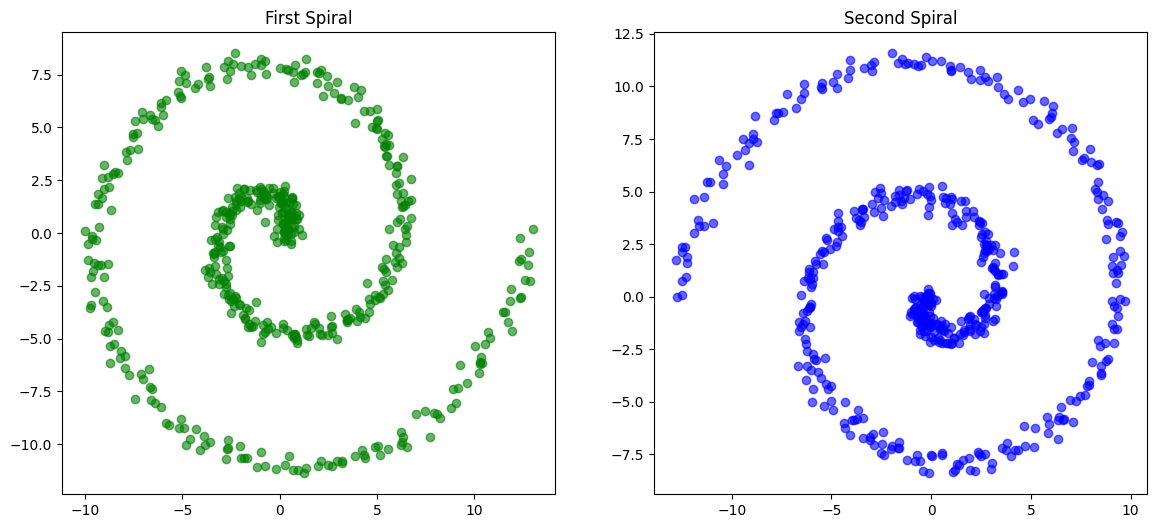

In [13]:
_, axes = plt.subplots(ncols=2, figsize=(14, 6))

axes[0].scatter(x1, y1, c='green', alpha=0.6)
axes[0].set_title('First Spiral')

axes[1].scatter(x2, y2, c='blue', alpha=0.6)
axes[1].set_title('Second Spiral')

Ну тут спіральна галактика.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

In [73]:
from scipy.integrate import solve_ivp

def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

initial_state = [1.0, 1.0, 1.0]
t_span = [0, 50]
t_eval = np.linspace(0, 50, 3000)

params = [
    (15, 30, 2.75),
    (14, 35, 8), 
    (20, 45, 0.5) 
]

trajectories = []
for sigma, rho, beta in params:
    sol = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)
    trajectories.append(sol.y)

lorenz_df = pd.DataFrame({
    'X': trajectories[0][0],
    'Y': trajectories[0][1],
    'Z': trajectories[0][2]
})
lorenz_df.to_csv('lorenz_trajectory.csv', index=False)

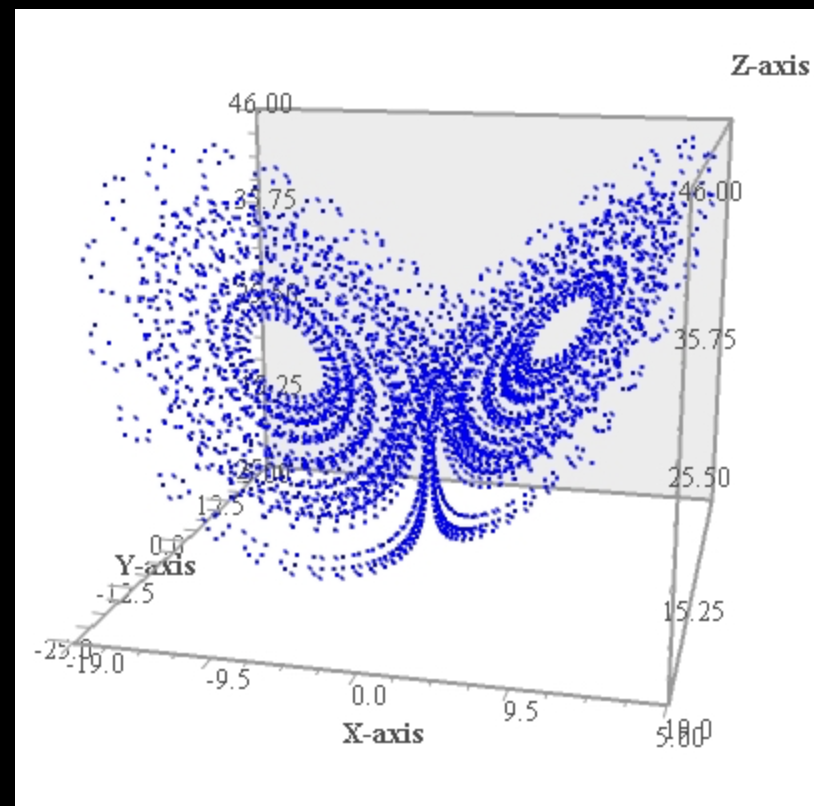

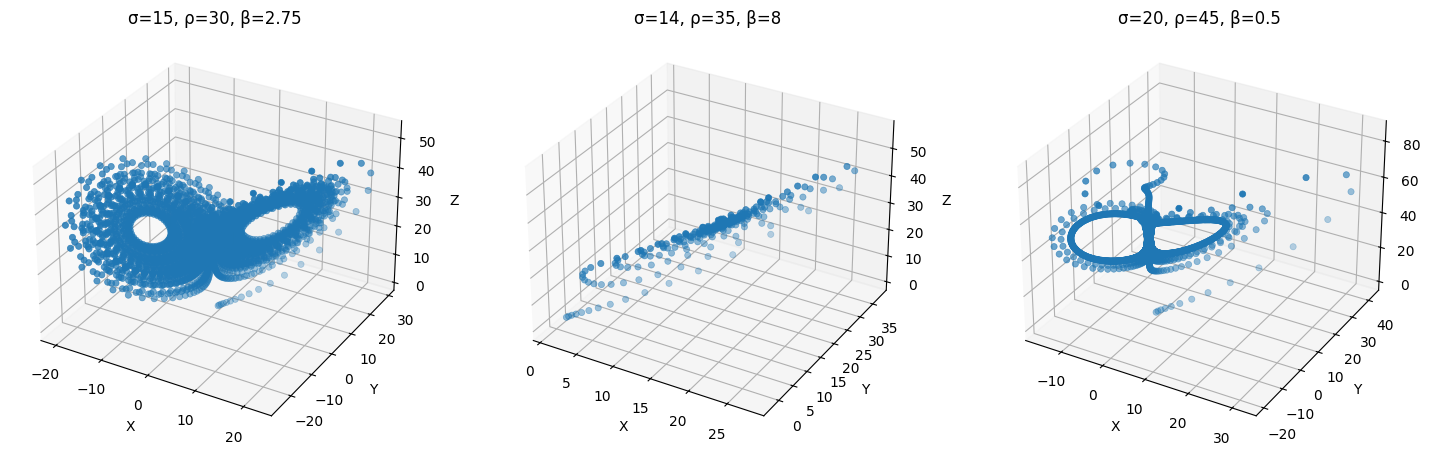

In [74]:
fig = plt.figure(figsize=(18, 10))
for i, (trajectory, param) in enumerate(zip(trajectories, params)):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(trajectory[0], trajectory[1], trajectory[2], lw=0.5)
    ax.set_title(f"σ={param[0]}, ρ={param[1]}, β={param[2]}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.show()

Тут, ми створювали ```Траєкторію системи Лоренца``` за допомгою методу ```Рунге-Кутти 4-го порядку``` \
Ми змінювали значення альфи, ро та бети і вишло 3 різні набори даних. \
На графіках ми можемо побачити що найбільш схожий до прикладу є перший графік. \
Також, на другому та третьому графікаї видно, що вид цієї фігури загалом залежить від значення **бета (β)**. Якщо він великий, або малий відносно \
інших значень то фігура стає хаотичною. Інші параметри відповідаю за довжину цього кола та кількість внутрішніх кілець.